<a href="https://colab.research.google.com/github/LatifulJoy/covid19-cnn-TL-mobilenet/blob/main/coividcnntl_18_5_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D,SeparableConv2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"latifuljoy","key":"5c49d122e1611b73411415358fb0fe9a"}'}

In [3]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [4]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 561M/572M [00:18<00:00, 23.8MB/s]
100% 572M/572M [00:18<00:00, 32.7MB/s]


In [5]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [6]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.


In [7]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [8]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['person755_virus_1380.jpeg']
image shape (2304, 2160)


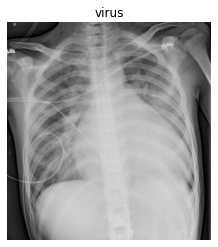

In [9]:
img = view_image("/content/COVID_IEEE/","virus")

['NORMAL2-IM-0636-0001.jpeg']
image shape (1051, 1376)


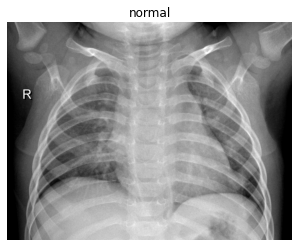

In [10]:
img = view_image("/content/COVID_IEEE/","normal")

['covid-19-caso-70-1-PA.jpg']
image shape (2880, 2376, 3)


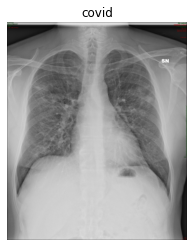

In [11]:
img = view_image("/content/COVID_IEEE/","covid")

In [12]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [13]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [14]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

In [15]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=0)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [17]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.001)

In [20]:
model = Sequential()

#Block Number 1
model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

Dropout(0.25)



#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

Dropout(0.25)

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

Dropout(0.25)

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))
Dropout(0.5)

model.add(Dense(units=128, activation="relu"))
Dropout(0.5)


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64)

Epoch 1/30
19/19 [==============================] - 22s 345ms/step - loss: 0.9810 - accuracy: 0.5051 - val_loss: 3.1871 - val_accuracy: 0.3014
Epoch 2/30
19/19 [==============================] - 4s 222ms/step - loss: 0.7391 - accuracy: 0.7247 - val_loss: 0.5870 - val_accuracy: 0.7192
Epoch 3/30
19/19 [==============================] - 4s 222ms/step - loss: 0.4610 - accuracy: 0.8130 - val_loss: 0.3585 - val_accuracy: 0.8425
Epoch 4/30
19/19 [==============================] - 4s 224ms/step - loss: 0.3782 - accuracy: 0.8611 - val_loss: 0.3015 - val_accuracy: 0.8836
Epoch 5/30
19/19 [==============================] - 4s 224ms/step - loss: 0.2447 - accuracy: 0.9211 - val_loss: 0.2455 - val_accuracy: 0.9247
Epoch 6/30
19/19 [==============================] - 4s 225ms/step - loss: 0.1942 - accuracy: 0.9374 - val_loss: 0.1901 - val_accuracy: 0.9418
Epoch 7/30
19/19 [==============================] - 4s 226ms/step - loss: 0.1713 - accuracy: 0.9374 - val_loss: 0.1794 - val_accuracy: 0.9349
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

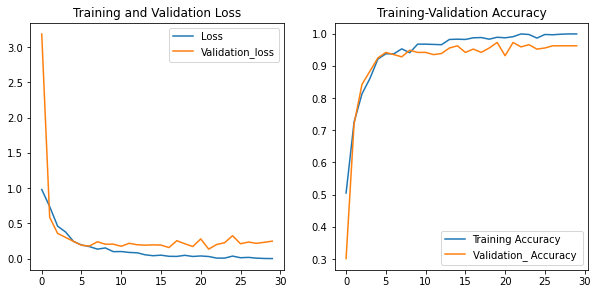

In [23]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [24]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [25]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       114
           1       0.96      0.89      0.92       131
           2       0.91      0.96      0.93       120

    accuracy                           0.94       365
   macro avg       0.94      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



In [26]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,111,1,2
normal,5,116,10
virus,1,4,115


MobileNet

In [66]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

In [68]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [69]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
)

In [70]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer= opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [72]:
model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
37/37 [==============================] - 4s 75ms/step - loss: 13.1079 - accuracy: 0.7444 - val_loss: 2.6176 - val_accuracy: 0.7979
Epoch 2/15
37/37 [==============================] - 2s 64ms/step - loss: 0.4377 - accuracy: 0.9563 - val_loss: 0.1507 - val_accuracy: 0.9897
Epoch 3/15
37/37 [==============================] - 2s 56ms/step - loss: 0.0977 - accuracy: 0.9777 - val_loss: 0.2418 - val_accuracy: 0.9555
Epoch 4/15
37/37 [==============================] - 2s 57ms/step - loss: 0.0483 - accuracy: 0.9906 - val_loss: 0.3053 - val_accuracy: 0.9486
Epoch 5/15
37/37 [==============================] - 2s 65ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.1365 - val_accuracy: 0.9897
Epoch 6/15
37/37 [==============================] - 2s 56ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.1450 - val_accuracy: 0.9863
Epoch 7/15
37/37 [==============================] - 2s 56ms/step - loss: 3.3020e-04 - accuracy: 1.0000 - val_loss: 0.1492 - val_accuracy: 0.9863
Epoch 8/

Text(0.5, 1.0, 'Training-Validation Accuracy')

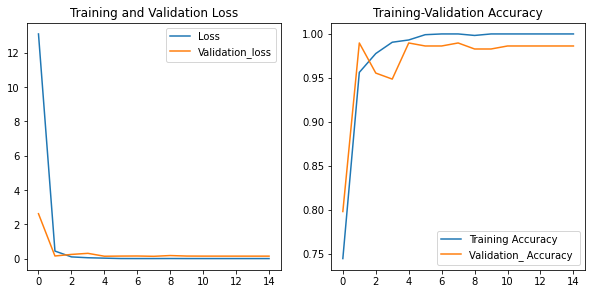

In [73]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [74]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [77]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       114
           1       0.95      0.94      0.94       131
           2       0.95      0.95      0.95       120

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



In [78]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,112,1,1
normal,3,123,5
virus,0,6,114


DenseNet121

In [54]:
densenet = tf.keras.applications.DenseNet121(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in densenet.layers:
  layer.trainable =False

29097984/29084464 [==============================] - 1s 0us/step


In [55]:
model = Flatten()(densenet.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [56]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=.0001)

In [57]:
model = Model(inputs = densenet.input, outputs = prediction_layer)
model.compile(optimizer=opt ,loss='categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_2[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                            

In [59]:
model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=32)

Epoch 1/15
37/37 [==============================] - 16s 237ms/step - loss: 0.4878 - accuracy: 0.8448 - val_loss: 0.2126 - val_accuracy: 0.9075
Epoch 2/15
37/37 [==============================] - 5s 141ms/step - loss: 0.0906 - accuracy: 0.9691 - val_loss: 0.0730 - val_accuracy: 0.9795
Epoch 3/15
37/37 [==============================] - 5s 130ms/step - loss: 0.0181 - accuracy: 0.9957 - val_loss: 0.0669 - val_accuracy: 0.9829
Epoch 4/15
37/37 [==============================] - 5s 141ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.0585 - val_accuracy: 0.9760
Epoch 5/15
37/37 [==============================] - 5s 130ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0635 - val_accuracy: 0.9760
Epoch 6/15
37/37 [==============================] - 5s 130ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9829
Epoch 7/15
37/37 [==============================] - 5s 132ms/step - loss: 8.5164e-04 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9829
E

Text(0.5, 1.0, 'Training-Validation Accuracy')

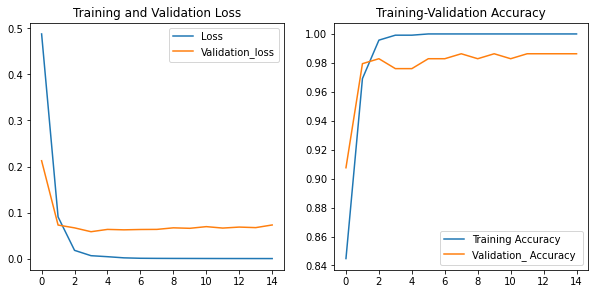

In [60]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [61]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [62]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       114
           1       0.96      0.95      0.95       131
           2       0.97      0.95      0.96       120

    accuracy                           0.96       365
   macro avg       0.96      0.97      0.96       365
weighted avg       0.96      0.96      0.96       365



In [63]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,114,0,0
normal,3,124,4
virus,1,5,114
